we'll attempt to predict the type of physical activity. (walking, climbing, stairs).

from tri-axial smartphone accelerometer data.



In [ ]:
import pandas as pd
import numpy as np


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings

train_labels.csv, contains the activity labels, and you'll be using these labels to train your model.

We use the following encoding: 

      1 = standing (de pie)
      2 = walking
      3 = stairs down
      4 = stairs up. 

Because the accelerometers are sampled at high frequency, the labels in train_labels.csv are only provided for every 10th observation in train_time_series.csv.

In [ ]:
#imput data
train_labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python for research - Harvard course/Proyectos/train_labels.csv")
train_time_series=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python for research - Harvard course/Proyectos/train_time_series.csv")

#test data
test_labels=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python for research - Harvard course/Proyectos/test_labels.csv")
test_time_series=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python for research - Harvard course/Proyectos/test_time_series.csv")



#Comprender la data

Data I have: 

train time serie:
>  X: horizontal
>  Y: horizontal
>  Z: vertical
>
>  timestamp 
>
>  unnamed (ID)
>
>  UTC time
>
train labels(etiquetas):


 > timestamp 
>
 > unnamed (ID)
>
 > UTC time
>
 > labels(1-2-3-4)

In [ ]:
train_labels

,Unnamed: 0,timestamp,UTC time,label
0,20589,1565109931087,2019-08-06T16:45:31.087,1
1,20599,1565109932090,2019-08-06T16:45:32.090,1
2,20609,1565109933092,2019-08-06T16:45:33.092,1
3,20619,1565109934094,2019-08-06T16:45:34.094,1
4,20629,1565109935097,2019-08-06T16:45:35.097,1
...,...,...,...,...
370,24289,1565110302030,2019-08-06T16:51:42.030,4
371,24299,1565110303032,2019-08-06T16:51:43.032,4
372,24309,1565110304034,2019-08-06T16:51:44.034,4
373,24319,1565110305037,2019-08-06T16:51:45.037,4


In [ ]:
train_time_series

,Unnamed: 0,timestamp,UTC time,accuracy,x,y,z
0,20586,1565109930787,2019-08-06T16:45:30.787,unknown,-0.006485,-0.934860,-0.069046
1,20587,1565109930887,2019-08-06T16:45:30.887,unknown,-0.066467,-1.015442,0.089554
2,20588,1565109930987,2019-08-06T16:45:30.987,unknown,-0.043488,-1.021255,0.178467
3,20589,1565109931087,2019-08-06T16:45:31.087,unknown,-0.053802,-0.987701,0.068985
4,20590,1565109931188,2019-08-06T16:45:31.188,unknown,-0.054031,-1.003616,0.126450
...,...,...,...,...,...,...,...
3739,24325,1565110305638,2019-08-06T16:51:45.638,unknown,0.024384,-0.710709,0.030304
3740,24326,1565110305738,2019-08-06T16:51:45.738,unknown,0.487228,-1.099136,-0.015213
3741,24327,1565110305838,2019-08-06T16:51:45.838,unknown,0.369446,-0.968506,0.036713
3742,24328,1565110305939,2019-08-06T16:51:45.939,unknown,0.167877,-0.802826,0.049805


In [ ]:
#Puedo ver que ambas tablas tienen elemntos en comun. 

data_time=['Unnamed: 0',"timestamp","UTC time"]

train_time_series[data_time].loc[3] == train_labels[data_time].loc[0]


Unnamed: 0    True
timestamp     True
UTC time      True
dtype: bool

Probare entender los datos juntando las columnas x,y,z con el ya resuelto en train labels

In [ ]:
train_ts_with_label_data= pd.DataFrame()

es importante saber cuando ignorar los index, ya que pandas lo toma mucho en cuenta para las operaciones.

In [ ]:
for i in list(train_labels['Unnamed: 0']):
  train_ts_with_label_data=train_ts_with_label_data.append(train_time_series.loc[train_time_series['Unnamed: 0']==i],ignore_index=True)

In [ ]:
train_ts_with_label_data[data_time] == train_labels[data_time]

,Unnamed: 0,timestamp,UTC time
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
370,True,True,True
371,True,True,True
372,True,True,True
373,True,True,True


In [ ]:
train_ts_with_label_data["label"]=train_labels['label']

Check for null data

In [ ]:
train_ts_with_label_data.isnull().sum()

Unnamed: 0    0
timestamp     0
UTC time      0
accuracy      0
x             0
y             0
z             0
label         0
dtype: int64

sums of the data output

In [ ]:
train_ts_with_label_data.groupby(["label"]).label.count()

label
1     27
2    213
3     88
4     47
Name: label, dtype: int64

Obtenemos los datos de entrenamiento y de prueba.

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(train_ts_with_label_data[["x","y","z"]],train_ts_with_label_data["label"],train_size=0.8, random_state=1)

Escoger un clasificador

In [ ]:
classification_outcome=train_ts_with_label_data['label']
all_covariates=["x","y","z"]
covariates=train_ts_with_label_data[all_covariates]

Creamos el calulador de porcentajes

In [ ]:
def accuracy(estimator,X,y):
  estimator.fit(X,y)
  predictions=estimator.predict(X)
  return (accuracy_score(y, predictions))

Creando lo clasificadores

In [ ]:
logi_regre=LogisticRegression()
random_forest_cla=RandomForestClassifier(max_depth=4,)

Determinar el cross validate para ambos modelos

In [ ]:
logistic_regression_scores=cross_val_score(logi_regre, covariates, classification_outcome, cv=10, scoring=accuracy)

forest_classification_scores = cross_val_score(random_forest_cla, covariates, classification_outcome, cv=10, scoring=accuracy)

Podemos ver que el cross val score realiza varios calculos de accuracy

In [ ]:
scores=pd.DataFrame({"logistic_regression_scores":logistic_regression_scores,"forest_classification_scores":forest_classification_scores}) 
scores

,logistic_regression_scores,forest_classification_scores
0,0.552632,0.973684
1,0.552632,0.868421
2,0.552632,0.947368
3,0.526316,0.894737
4,0.552632,0.894737
5,0.540541,1.000000
6,0.621622,0.864865
7,0.594595,0.918919
8,0.594595,0.864865
9,0.594595,0.945946


In [ ]:
accuracy(random_forest_cla,covariates,classification_outcome)

0.6506666666666666

Grafica selectiva de los resultados

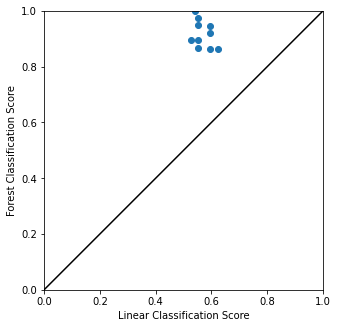

In [ ]:
plt.figure(figsize = (5,10))
plt.axes().set_aspect('equal', 'box')#el aspecto
plt.scatter(logistic_regression_scores, forest_classification_scores )#dispersar
plt.plot((0, 1), (0, 1), 'k-')#la linea

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")
plt.show()

Tuning (Ajustar) the Random Forest Classifier

In [ ]:
#Arguments

n_estimators=[100,200,300,400,500]
max_features=['auto', 'sqrt']
max_depth = [3,4,5,6,7,8,9,10,11,12,13,14,15, None]
min_samples_split=[2, 5, 10,]
min_samples_leaf=[1, 2, 3]
bootstrap=[True, False]

random_grid_argument = {'n_estimators': n_estimators, 'max_features': max_features, 
               'max_depth': max_depth, 'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

Find the best parameters for the Random Forest Classifer (for a better fit) and the score if those paremeters were used

In [ ]:
rf_random = RandomizedSearchCV(estimator=random_forest_cla, param_distributions=random_grid_argument, n_iter =100, cv=3, verbose=2, random_state=1)
rf_random.fit(covariates, classification_outcome)
print(rf_random.best_params_)
print(rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=2

Observamos que la configuracion con mejor estimacion es la que guardamos como arg

In [ ]:
arg={'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}
random_forest_cla=RandomForestClassifier(**arg)

In [ ]:
random_forest_cla.fit(X_train,Y_train)
prediction=random_forest_cla.predict(X_test)
accuracy_score(Y_test,prediction)

0.6133333333333333

Aplicamos totalmente el modelo

In [ ]:
test_data=pd.merge(test_labels,test_time_series[all_covariates],left_index=True, right_index=True)
test_data

,Unnamed: 0,timestamp,UTC time,label,x,y,z
0,24339,1565110307041,2019-08-06T16:51:47.041,NaN,0.034286,-1.504456,0.157623
1,24349,1565110308043,2019-08-06T16:51:48.043,NaN,0.409164,-1.038544,0.030975
2,24359,1565110309046,2019-08-06T16:51:49.046,NaN,-0.234390,-0.984558,0.124771
3,24369,1565110310048,2019-08-06T16:51:50.048,NaN,0.251114,-0.787003,0.054810
4,24379,1565110311050,2019-08-06T16:51:51.050,NaN,0.109924,-0.169510,0.235550
...,...,...,...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,NaN,0.159500,-0.510345,0.266525
121,25549,1565110428369,2019-08-06T16:53:48.369,NaN,0.513840,-0.462250,0.330734
122,25559,1565110429371,2019-08-06T16:53:49.371,NaN,1.006775,-1.895035,-0.262756
123,25569,1565110430373,2019-08-06T16:53:50.373,NaN,0.133636,-0.828430,0.065308


In [ ]:
test_covariates=test_data[all_covariates]
random_forest_cla.fit(covariates,classification_outcome)
label_prediction=random_forest_cla.predict(test_covariates)

In [ ]:
test_labels["label"]=label_prediction
test_labels

,Unnamed: 0,timestamp,UTC time,label
0,24339,1565110307041,2019-08-06T16:51:47.041,2
1,24349,1565110308043,2019-08-06T16:51:48.043,2
2,24359,1565110309046,2019-08-06T16:51:49.046,2
3,24369,1565110310048,2019-08-06T16:51:50.048,3
4,24379,1565110311050,2019-08-06T16:51:51.050,2
...,...,...,...,...
120,25539,1565110427366,2019-08-06T16:53:47.366,3
121,25549,1565110428369,2019-08-06T16:53:48.369,3
122,25559,1565110429371,2019-08-06T16:53:49.371,2
123,25569,1565110430373,2019-08-06T16:53:50.373,2


Clonclusion:

Requiero mucha practica, hay mucho que no domino y no sabria por donde continuar.  